In [16]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('amazon.csv')

In [18]:
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [19]:
df.Positive.value_counts()

Positive
1    15233
0     4767
Name: count, dtype: int64

In [20]:
df_train, df_test, y_train, y_test = train_test_split(df['reviewText'], df.Positive.values, test_size=0.33)
df_train.shape, df_test.shape, y_train.shape, y_test.shape

((13400,), (6600,), (13400,), (6600,))

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df_train)
train_seq = tokenizer.texts_to_sequences(df_train)
test_seq = tokenizer.texts_to_sequences(df_test)

In [22]:
tokenizer.index_word

{1: 'i',
 2: 'the',
 3: 'it',
 4: 'to',
 5: 'and',
 6: 'this',
 7: 'a',
 8: 'is',
 9: 'app',
 10: 'my',
 11: 'you',
 12: 'of',
 13: 'for',
 14: 'on',
 15: 'game',
 16: 'have',
 17: 'that',
 18: 'but',
 19: 'not',
 20: 'so',
 21: 'with',
 22: 'in',
 23: 'great',
 24: 'love',
 25: 'like',
 26: 'can',
 27: 'all',
 28: 'was',
 29: 'use',
 30: 'get',
 31: 'are',
 32: 'me',
 33: 'very',
 34: 'kindle',
 35: 'just',
 36: 'your',
 37: 'as',
 38: 'if',
 39: 'one',
 40: 'fun',
 41: 'be',
 42: 'when',
 43: 'or',
 44: 'time',
 45: 'do',
 46: 'free',
 47: 'really',
 48: 'at',
 49: "don't",
 50: "it's",
 51: 'up',
 52: 'play',
 53: 'what',
 54: 'would',
 55: 'easy',
 56: 'has',
 57: 'an',
 58: 'fire',
 59: 'its',
 60: 'good',
 61: 'no',
 62: 'works',
 63: 'more',
 64: 'out',
 65: 'from',
 66: 'there',
 67: 'will',
 68: 'even',
 69: 'well',
 70: 'had',
 71: 'they',
 72: 'much',
 73: 'because',
 74: 'apps',
 75: 'does',
 76: 'now',
 77: 'how',
 78: 'am',
 79: 'phone',
 80: 'then',
 81: 'want',
 82: 'ot

In [23]:
word2idx = tokenizer.word_index
V = len(word2idx)
V

15691

In [24]:
df_train = tf.keras.preprocessing.sequence.pad_sequences(train_seq)
df_train.shape[1]

62

In [25]:
df_test = tf.keras.preprocessing.sequence.pad_sequences(test_seq, maxlen=df_train.shape[1])

In [26]:
df_train.shape, df_test.shape

((13400, 62), (6600, 62))

In [38]:
D = 20

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(df_train.shape[1])),
    tf.keras.layers.Embedding(V + 1, D),
    tf.keras.layers.Conv1D(32, 3 , activation='tanh'),
    tf.keras.layers.MaxPool1D(3),
    tf.keras.layers.Dropout(.6),

    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool1D(3),
    tf.keras.layers.Dropout(.6),

    tf.keras.layers.Conv1D(128, 3, activation='elu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [41]:
r = model.fit(df_train, y_train, validation_data=(df_test, y_test), epochs=10, callbacks=[early_stopping], batch_size=32)

Epoch 1/10
419/419 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.7890

2024-02-01 23:08:27.141013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


419/419 [==============================] - 34s 77ms/step - loss: 0.6966 - accuracy: 0.7890 - val_loss: 0.4076 - val_accuracy: 0.8620
Epoch 2/10
419/419 [==============================] - 26s 62ms/step - loss: 0.2781 - accuracy: 0.8898 - val_loss: 0.3214 - val_accuracy: 0.8689
Epoch 3/10
419/419 [==============================] - 23s 55ms/step - loss: 0.1971 - accuracy: 0.9262 - val_loss: 0.3829 - val_accuracy: 0.8432
Epoch 4/10
419/419 [==============================] - 22s 54ms/step - loss: 0.1529 - accuracy: 0.9480 - val_loss: 0.4201 - val_accuracy: 0.8289
Epoch 5/10
419/419 [==============================] - ETA: 0s - loss: 0.1199 - accuracy: 0.9596

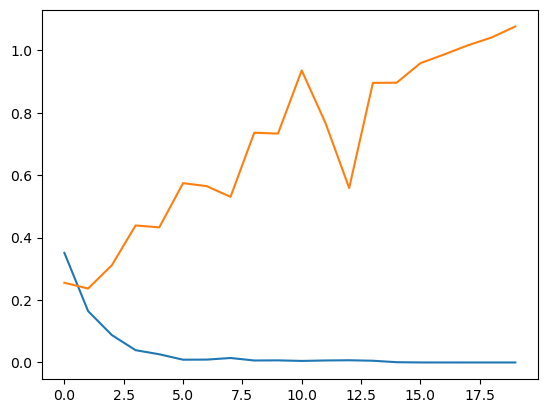

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

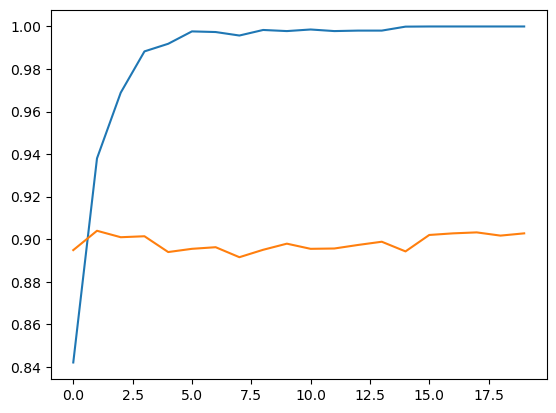

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')